In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import sys
sys.path.insert(0,"../python")

In [4]:
from load_sim_tigresspp import LoadSimTIGRESSPP

In [5]:
sim = LoadSimTIGRESSPP("/scratch/gpfs/EOST/changgoo/tigress_classic/crmhd-8pc-b1-mhdbc_diode-crbc_lngrad_out-sigma28_va1/",verbose=True)

[LoadSimTIGRESSPP-INFO] basedir: /scratch/gpfs/EOST/changgoo/tigress_classic/crmhd-8pc-b1-mhdbc_diode-crbc_lngrad_out-sigma28_va1
[LoadSimTIGRESSPP-INFO] savdir: /scratch/gpfs/EOST/changgoo/tigress_classic/crmhd-8pc-b1-mhdbc_diode-crbc_lngrad_out-sigma28_va1
[LoadSimTIGRESSPP-INFO] load_method: xarray
[FindFiles-INFO] athinput: /scratch/gpfs/EOST/changgoo/tigress_classic/crmhd-8pc-b1-mhdbc_diode-crbc_lngrad_out-sigma28_va1/athinput.runtime
[FindFiles-INFO] athena_variant: Athena++
[FindFiles-INFO] problem_id: TIGRESS
[FindFiles-INFO] hdf5 (prim,uov): /scratch/gpfs/EOST/changgoo/tigress_classic/crmhd-8pc-b1-mhdbc_diode-crbc_lngrad_out-sigma28_va1 nums: 0-383
[FindFiles-WARNING] hdf5 (d,p,Ec) files not found in /scratch/gpfs/EOST/changgoo/tigress_classic/crmhd-8pc-b1-mhdbc_diode-crbc_lngrad_out-sigma28_va1
[FindFiles-INFO] parbin (par0): /scratch/gpfs/EOST/changgoo/tigress_classic/crmhd-8pc-b1-mhdbc_diode-crbc_lngrad_out-sigma28_va1 nums: 0-383
[FindFiles-INFO] parhst: /scratch/gpfs/EOST

In [6]:
# load original zprof
zp = sim.load_zprof()

[LoadSimTIGRESSPP-INFO] Read from existing netcdf: /scratch/gpfs/EOST/changgoo/tigress_classic/crmhd-8pc-b1-mhdbc_diode-crbc_lngrad_out-sigma28_va1/merged_zprof/merged_zprof.nc


In [7]:
# load (or create) post-processed zprof for one time
zp_pp = sim.load_zprof_postproc_one(sim.nums[-1])

[LoadSimTIGRESSPP-INFO] creating: /scratch/gpfs/EOST/changgoo/tigress_classic/crmhd-8pc-b1-mhdbc_diode-crbc_lngrad_out-sigma28_va1/zprof_postproc/TIGRESS.00383.zprof.nc


In [8]:
import matplotlib.pyplot as plt

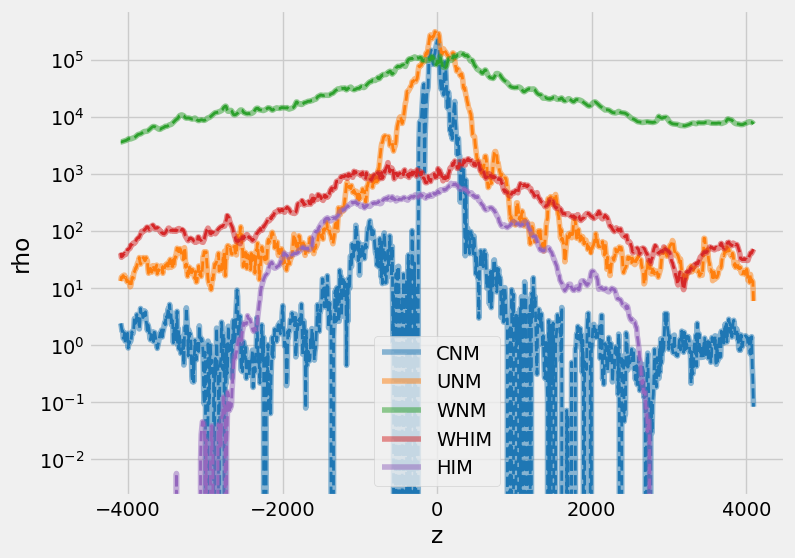

In [9]:
with plt.style.context("fivethirtyeight"):
    plt.figure(figsize=(8,6))
    phases = list(zp.phase.data)
    for i,ph in enumerate(phases[:-1]):
        zp["rho"].sel(time=zp.time[-1]).sum(dim="vz_dir").sel(phase=ph).plot(color=f"C{i}",label=ph,alpha=0.5)
        zp_pp["rho"].sum(dim="vz_dir").sel(phase=ph).plot(color=f"C{i}",ls="--",lw=2,label=None)
        plt.title("")
    plt.legend()
    plt.yscale("log")

In [11]:
zp_pp

<xarray.Dataset> Size: 1MB
Dimensions:            (vz_dir: 2, phase: 5, z: 1024)
Coordinates:
  * z                  (z) float64 8kB -4.092e+03 -4.084e+03 ... 4.092e+03
  * phase              (phase) <U4 80B 'CNM' 'UNM' 'WNM' 'WHIM' 'HIM'
  * vz_dir             (vz_dir) int64 16B -1 1
    time               float32 4B 383.0
Data variables: (12/13)
    rho                (vz_dir, phase, z) float64 82kB 1.362 1.504 ... 0.0 0.0
    Fcr_diff_parallel  (vz_dir, phase, z) float64 82kB 4.604e+04 ... 0.0
    Gamma_cr_stream    (vz_dir, phase, z) float64 82kB -41.46 -72.49 ... 0.0 0.0
    GradPcr_parallel   (vz_dir, phase, z) float64 82kB 1.421 2.123 ... 0.0 0.0
    CRLosses           (vz_dir, phase, z) float64 82kB -0.9107 -1.013 ... 0.0
    CRwork_total       (vz_dir, phase, z) float64 82kB -31.63 -96.51 ... 0.0 0.0
    ...                 ...
    CRwork_perp        (vz_dir, phase, z) float64 82kB -21.57 -70.07 ... 0.0 0.0
    0-Veff1            (vz_dir, phase, z) float64 82kB 6.222e+03 ... 0.0
    0-Veff2            (vz_dir, phase, z) float64 82kB -7.231e+03 ... 0.0
    0-Veff3            (vz_dir, phase, z) float64 82kB -8.8e+04 ... 0.0
    cool_rate          (vz_dir, phase, z) float64 82kB 7.117e-32 ... 0.0
    heat_rate          (vz_dir, phase, z) float64 82kB 1.909e-26 ... 0.0

In [10]:
zp

<xarray.Dataset> Size: 3GB
Dimensions:        (vz_dir: 2, phase: 6, time: 384, z: 1024)
Coordinates:
  * z              (z) int64 8kB -4092 -4084 -4076 -4068 ... 4068 4076 4084 4092
  * time           (time) float64 3kB 0.0 1.0 2.0 3.0 ... 381.0 382.0 383.0
  * phase          (phase) <U5 120B 'CNM' 'UNM' 'WNM' 'WHIM' 'HIM' 'whole'
  * vz_dir         (vz_dir) int64 16B 1 -1
Data variables: (12/75)
    area           (vz_dir, phase, time, z) float64 38MB 0.0 0.0 ... 576.0 832.0
    dens           (vz_dir, phase, time, z) float64 38MB 0.0 0.0 ... 2.403 4.229
    rho            (vz_dir, phase, time, z) float64 38MB 0.0 0.0 ... 2.403 4.229
    Etot           (vz_dir, phase, time, z) float64 38MB 0.0 0.0 ... 2.535e+03
    press          (vz_dir, phase, time, z) float64 38MB 0.0 0.0 ... 170.3 307.9
    mom1           (vz_dir, phase, time, z) float64 38MB 0.0 0.0 ... 11.99 15.15
    ...             ...
    0-Ceff2-vz2    (vz_dir, phase, time, z) float64 38MB 0.0 0.0 ... 8.583e+06
    0-Fd_B         (vz_dir, phase, time, z) float64 38MB 0.0 0.0 ... 8.27e+04
    0-GradPc_B     (vz_dir, phase, time, z) float64 38MB 0.0 0.0 ... 1.242 2.552
    0-cooling_cr   (vz_dir, phase, time, z) float64 38MB 0.0 0.0 ... -1.71 -3.05
    0-heating_cr   (vz_dir, phase, time, z) float64 38MB 0.0 0.0 ... -141.8
    0-work_cr      (vz_dir, phase, time, z) float64 38MB 0.0 0.0 ... 116.5 126.1

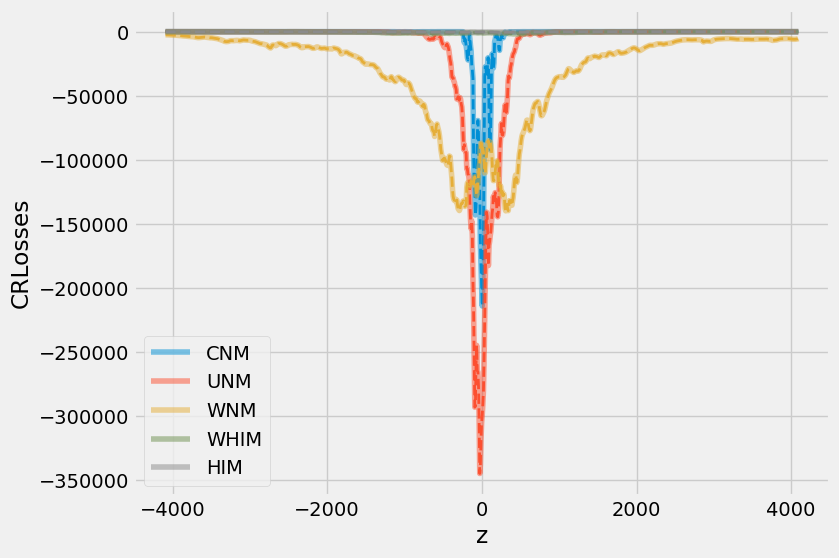

In [15]:
with plt.style.context("fivethirtyeight"):
    plt.figure(figsize=(8,6))
    phases = list(zp.phase.data)
    for i,ph in enumerate(phases[:-1]):
        zp["0-cooling_cr"].sel(time=zp.time[-1]).sum(dim="vz_dir").sel(phase=ph).plot(color=f"C{i}",label=ph,alpha=0.5)
        zp_pp["CRLosses"].sum(dim="vz_dir").sel(phase=ph).plot(color=f"C{i}",ls="--",lw=2,label=None)
        plt.title("")
    plt.legend()
    # plt.yscale("log")
    plt.show()

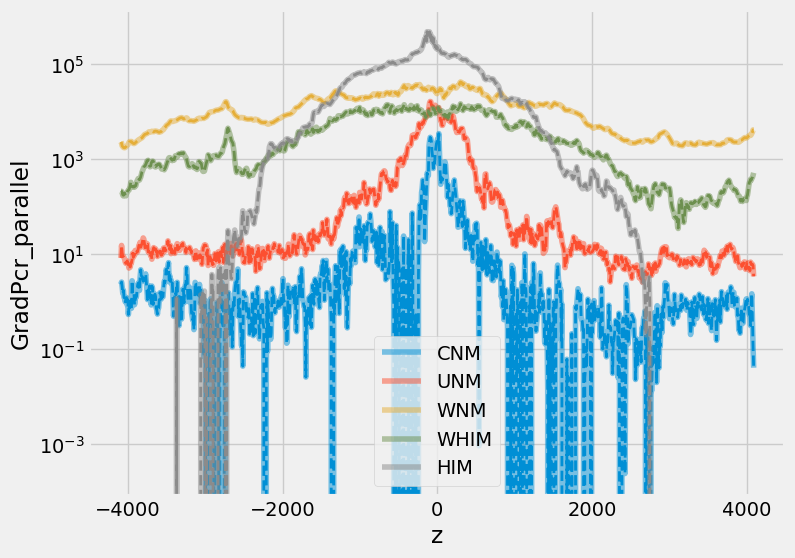

In [17]:
with plt.style.context("fivethirtyeight"):
    plt.figure(figsize=(8,6))
    phases = list(zp.phase.data)
    for i,ph in enumerate(phases[:-1]):
        zp["0-GradPc_B"].sel(time=zp.time[-1]).sum(dim="vz_dir").sel(phase=ph).plot(color=f"C{i}",label=ph,alpha=0.5)
        zp_pp["GradPcr_parallel"].sum(dim="vz_dir").sel(phase=ph).plot(color=f"C{i}",ls="--",lw=2,label=None)
        plt.title("")
    plt.legend()
    plt.yscale("log")
    plt.show()

In [ ]:
# to construct post-processed zprof for all snapshots, simply call
zp_pp = sim.load_zprof_postproc()